In [1]:
import exomlib
import numpy as np
import matplotlib.pyplot as plt

# make plots inline
%matplotlib inline

In [3]:
# main simulation code
# HD 20782 b

# star properties

mass_star = 1.04 # solar masses

# planet properties

mass_planet = 1.4879 # jupiter masses
a_planet = 1.3649 # AU, astronomical units
e_planet = 0.95 # eccentricity

# moon properties

#a_moon = 1.0 # lunar distances
e_moon = 0.0 # moon eccentricity

rh = (a_planet/0.002695)*(1-e_planet)*(mass_planet/(3.*mass_star*1048.))**(1/3.)
rhp = (a_planet/0.002695)*(1-e_planet)*(mass_planet/((3.+e_planet)*mass_star*1048.))**(1/3.)
rha = (a_planet/0.002695)*(1+e_planet)*(mass_planet/((3.-e_planet)*mass_star*1048.))**(1/3.)

mass_moon_values = [0.1, 0.5, 1.0, 5.0, 10.0]

print('Planet Mass   = ', mass_planet, 'Mj')
print('Planet eccen. = ', e_planet)
print('Star Mass     = ', mass_star, 'Ms')
print('Hill Sphere   = ', round(rh,2), 'LD')
print('Hill Sphere P = ', round(rhp,2), 'LD')
print('Hill Sphere A = ', round(rha,2), 'LD')
print()

for mass_moon in mass_moon_values: # earth masses
    
    print()
    print('Moon Mass = ', mass_moon, ' Me')
    
    rh_moon_values = [1.0, 0.80, 0.60, 0.40, 0.20]
    
    for dist in rh_moon_values: #lunar distances
        
        a_moon = dist*rhp
        
        # integration properties

        n_orbits = 1000
        n_points_orbit = 10

        print()
        print('m_moon = ', mass_moon, 'Me, a_moon = ', dist, 'RH (', round(a_moon,2), 'LD)')
        data = exomlib.exomoon_orbit1(mass_star = mass_star, 
                                  mass_planet = mass_planet, a_planet = a_planet, e_planet = e_planet, 
                                  mass_moon = mass_moon, a_moon = a_moon, e_moon = e_moon, 
                                  n_orbits = n_orbits, n_points_orbit = n_points_orbit)

Planet Mass   =  1.4879 Mj
Planet eccen. =  0.95
Star Mass     =  1.04 Ms
Hill Sphere   =  1.95 LD
Hill Sphere P =  1.78 LD
Hill Sphere A =  86.24 LD


Moon Mass =  0.1  Me

m_moon =  0.1 Me, a_moon =  1.0 RH ( 1.78 LD)
---------------------------------------------------------------
          Orbit      Time (yrs)          a (AU)          d (LD)
---------------------------------------------------------------
              0               0            1.36            1.78
            100             156            1.36       212261.83
            200             312            1.36       428232.84
            300             469            1.36       643995.89
            400             625            1.36       859386.14
            500             781            1.36      1074295.56
            600             938            1.36      1289380.22
            700            1094            1.36      1504542.78
            800            1251            1.36      1719767.70
            

KeyboardInterrupt: 

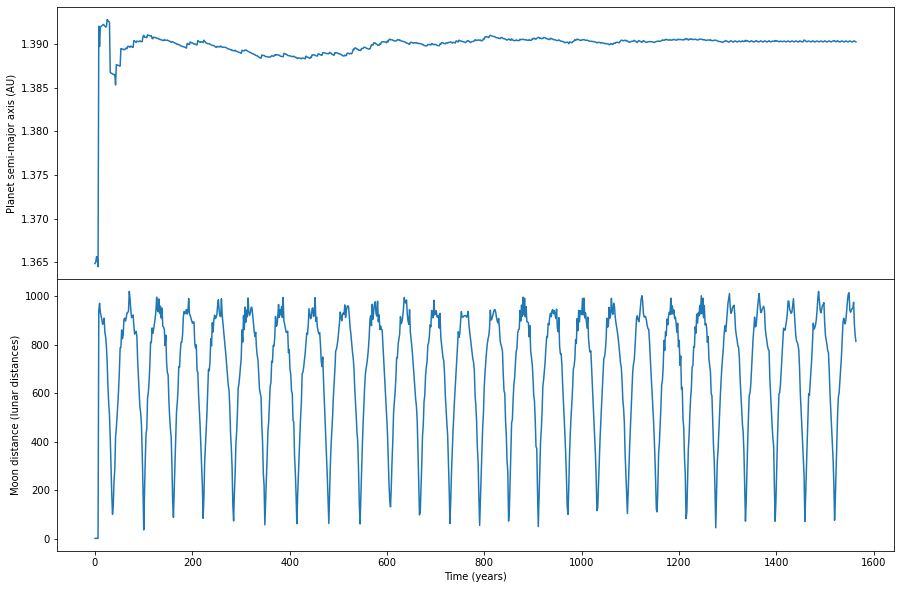

In [8]:
# Figure 1

fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot(211)
# ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Planet semi-major axis (AU)')
plt.plot(data.t/(2*np.pi), data.a);

ax2 = plt.subplot(212, sharex = ax1)
ax2.set_xlabel('Time (years)')
ax2.set_ylabel('Moon distance (lunar distances)')
plt.plot(data.t/(2*np.pi), data.d);

plt.subplots_adjust(hspace = 0.0)

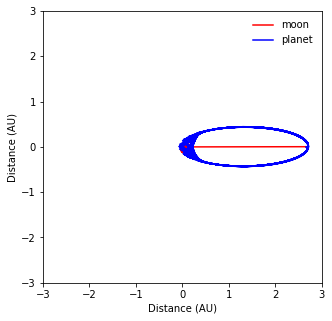

In [12]:
# Figure 2

fig = plt.figure(figsize = (5,5))
ax = plt.subplot(111)
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_xlabel('Distance (AU)')
ax.set_ylabel('Distance (AU)')
plt.plot(data.xs, data.ys, color = 'black');
plt.plot(data.x, data.y, color = 'red', label = 'moon');
plt.plot(data.xp, data.yp, color = 'blue', label = 'planet');
plt.legend(frameon = False);